In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input/fatalities-data-cleaned'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fatalities-data-cleaned/fatalities_isr_pse_conflict_2000_to_2023.csv


In [2]:
df = pd.read_csv("/kaggle/input/fatalities-data-cleaned/fatalities_isr_pse_conflict_2000_to_2023.csv")

In [3]:
df.head()

,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by
0,9/24/2023,32,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
1,9/24/2023,21,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,Unknown,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces
2,9/22/2023,16,Palestinian,Kfar Dan,Jenin,West Bank,9/22/2023,M,Unknown,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces
3,9/20/2023,19,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,9/20/2023,M,Unknown,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces
4,9/19/2023,15,Palestinian,Jenin R.C.,Jenin,West Bank,9/19/2023,M,Unknown,Jenin,Jenin,gunfire,live ammunition,Israeli security forces


# Data Cleaning and Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   date_of_event                 11124 non-null  object
 1   age                           11124 non-null  int64 
 2   citizenship                   11124 non-null  object
 3   event_location                11124 non-null  object
 4   event_location_district       11124 non-null  object
 5   event_location_region         11124 non-null  object
 6   date_of_death                 11124 non-null  object
 7   gender                        11124 non-null  object
 8   took_part_in_the_hostilities  11124 non-null  object
 9   place_of_residence            11124 non-null  object
 10  place_of_residence_district   11124 non-null  object
 11  type_of_injury                11124 non-null  object
 12  ammunition                    11124 non-null  object
 13  killed_by       

In [5]:
df.describe()

,age
count,11124.000000
mean,26.435545
std,13.996464
min,0.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [6]:
df.isna().sum()

date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64

# Data Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

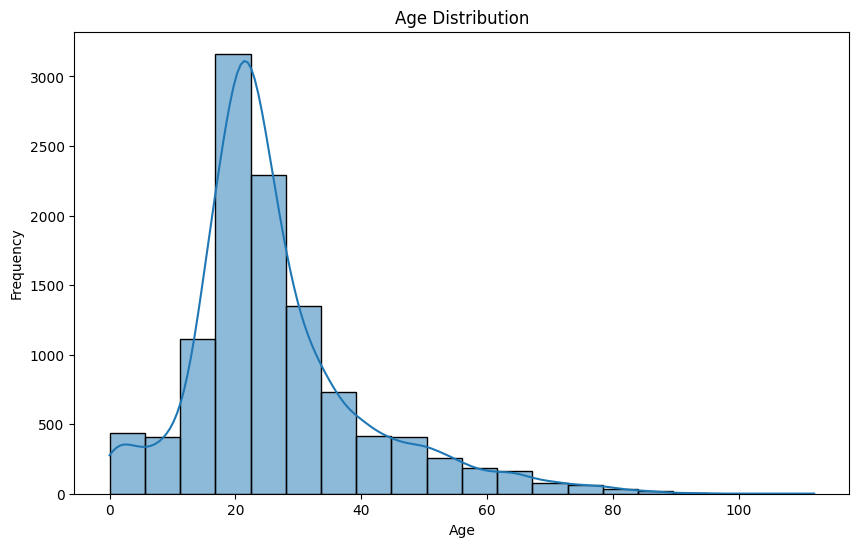

In [8]:
# Histogram for the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

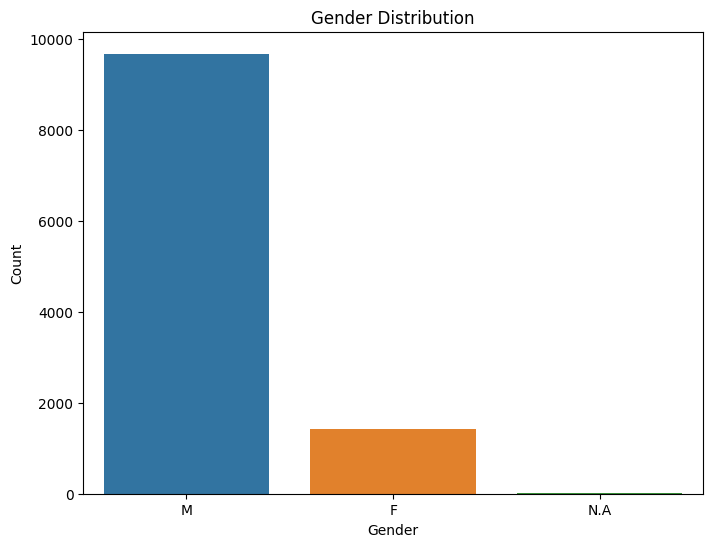

In [9]:
#Bar plot for 'gender'
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

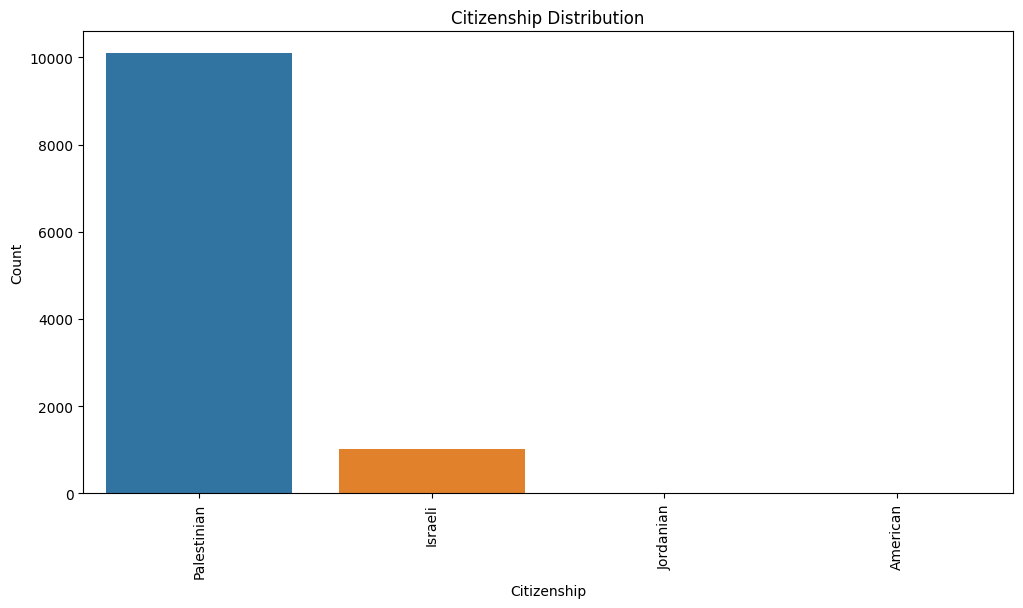

In [10]:
#Bar plot for 'citizenship'
citizenship_counts = df['citizenship'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=citizenship_counts.index, y=citizenship_counts.values)
plt.title('Citizenship Distribution')
plt.xlabel('Citizenship')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

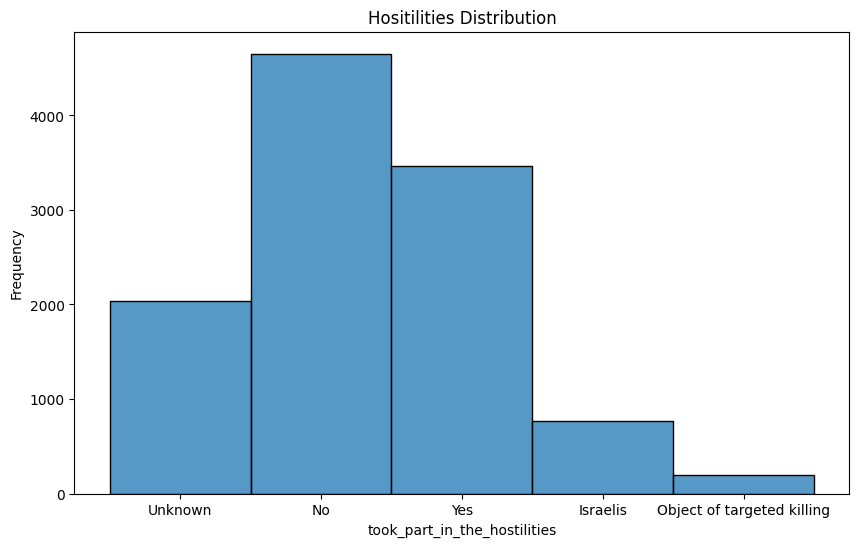

In [11]:
# Histogram for the 'took_part_in_the_hostilities' column
plt.figure(figsize=(10, 6))
sns.histplot(df['took_part_in_the_hostilities'], bins=20, kde=False)
plt.title('Hositilities Distribution')
plt.ylabel('Frequency')
plt.show()

# Time Series Analysis

In [12]:
# Time Series Analysis
# Converting date columns to datetime
df['date_of_event'] = pd.to_datetime(df['date_of_event'])
df['date_of_death'] = pd.to_datetime(df['date_of_death'])

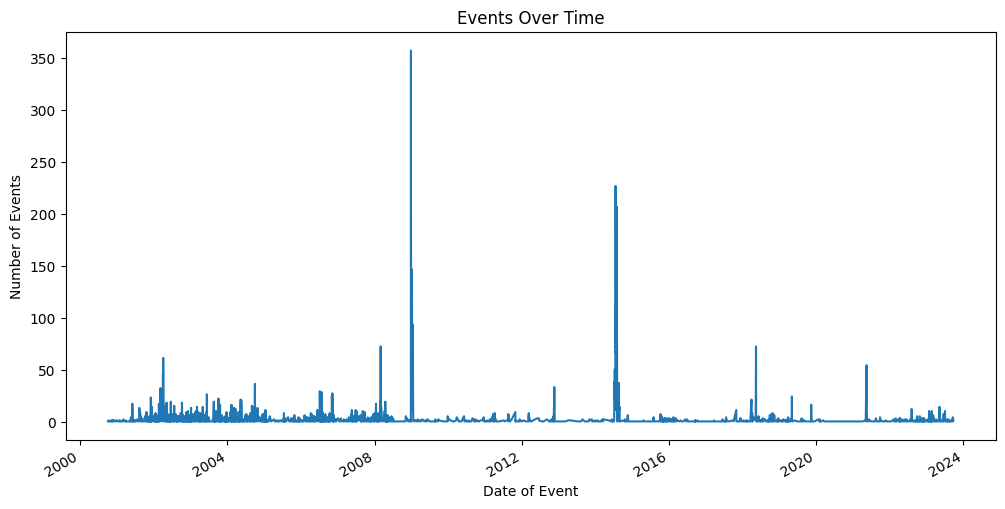

In [13]:
# Calculating the number of events per day
events_per_day = df.groupby('date_of_event').size()

plt.figure(figsize=(12, 6))
events_per_day.plot()
plt.title('Events Over Time')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.show()

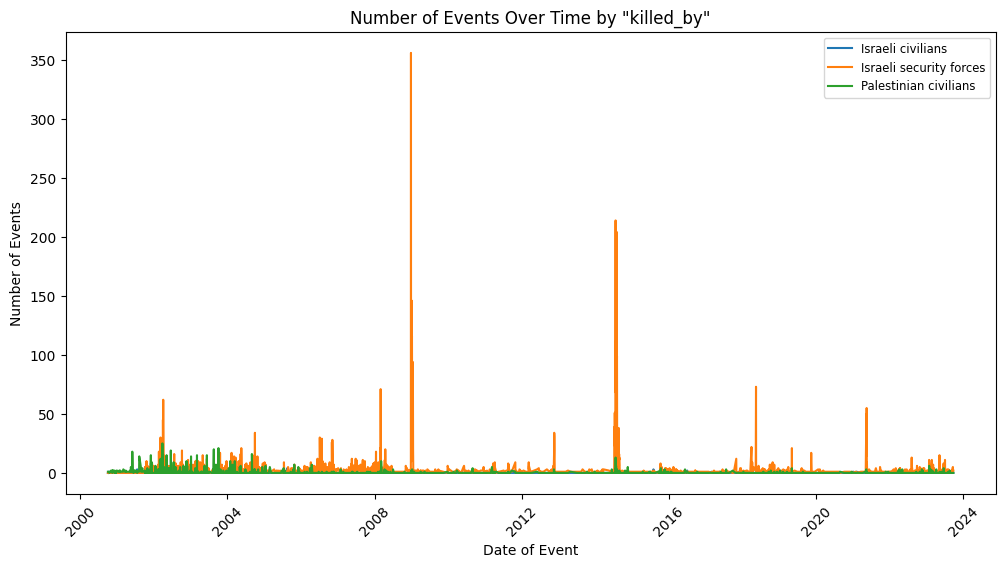

In [14]:
# Grouping the 'date_of_event' and 'killed_by' column and calculating 
#the count of events for each combination

events_by_killed_by = df.groupby(['date_of_event', 'killed_by']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_killed_by.columns:
    plt.plot(events_by_killed_by.index, events_by_killed_by[column], label=column)

plt.title('Number of Events Over Time by "killed_by"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

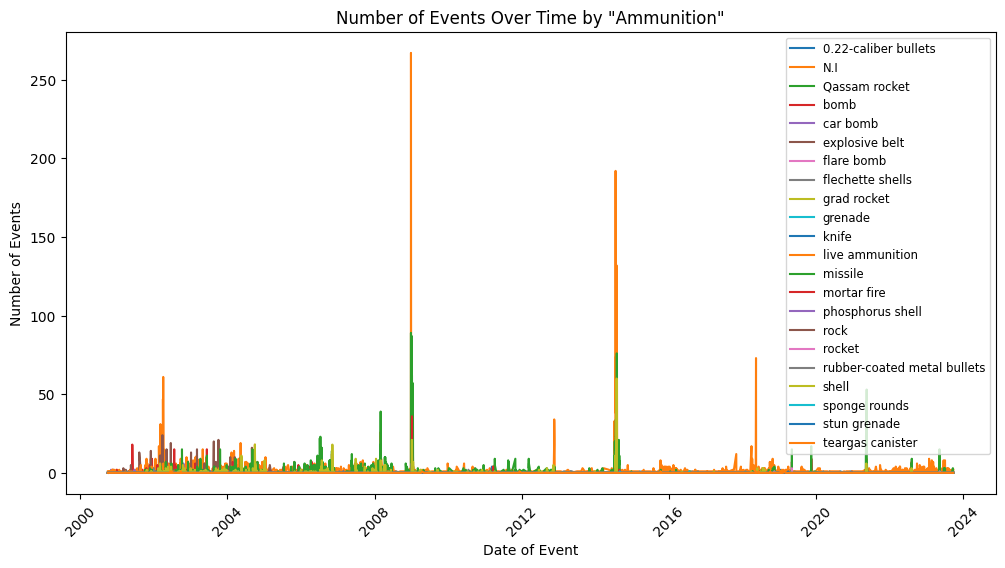

In [15]:

# Grouping the 'date_of_event' and 'ammunition' columns and calculating
# the count of events for each combination

events_by_ammunition = df.groupby(['date_of_event', 'ammunition']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
for column in events_by_ammunition.columns:
    plt.plot(events_by_ammunition.index, events_by_ammunition[column], label=column)

plt.title('Number of Events Over Time by "Ammunition"')
plt.xlabel('Date of Event')
plt.ylabel('Number of Events')
plt.legend(loc='upper right', fontsize='small')
plt.xticks(rotation=45)
plt.show()

# Geological Analysis

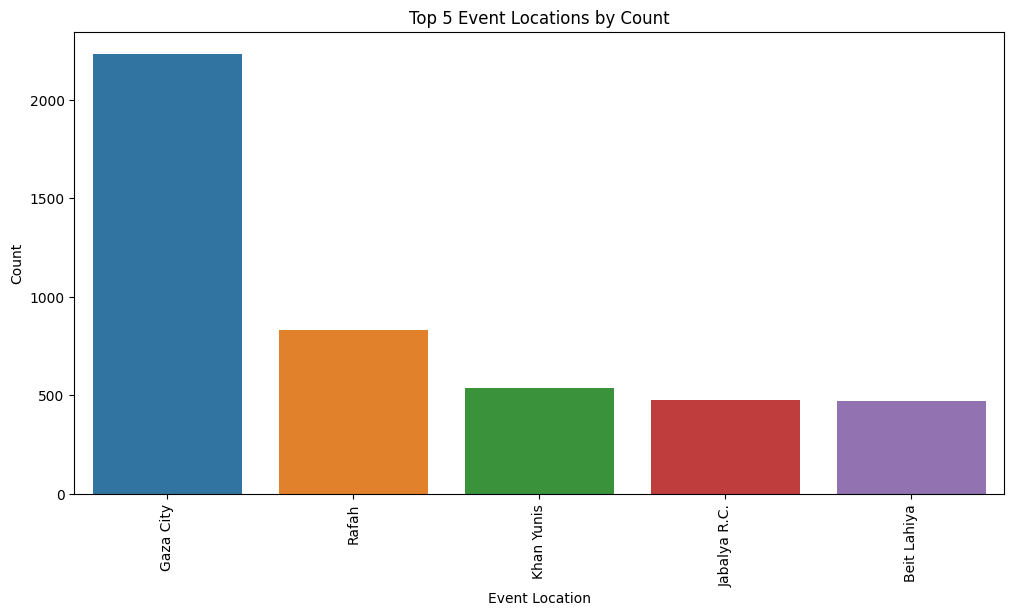

In [16]:
#Top 5 event locations by count
top5_event_locations = df['event_location'].value_counts().head(5)

#Bar plot for the top 5 event locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_event_locations.index, y=top5_event_locations.values)
plt.title('Top 5 Event Locations by Count')
plt.xlabel('Event Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

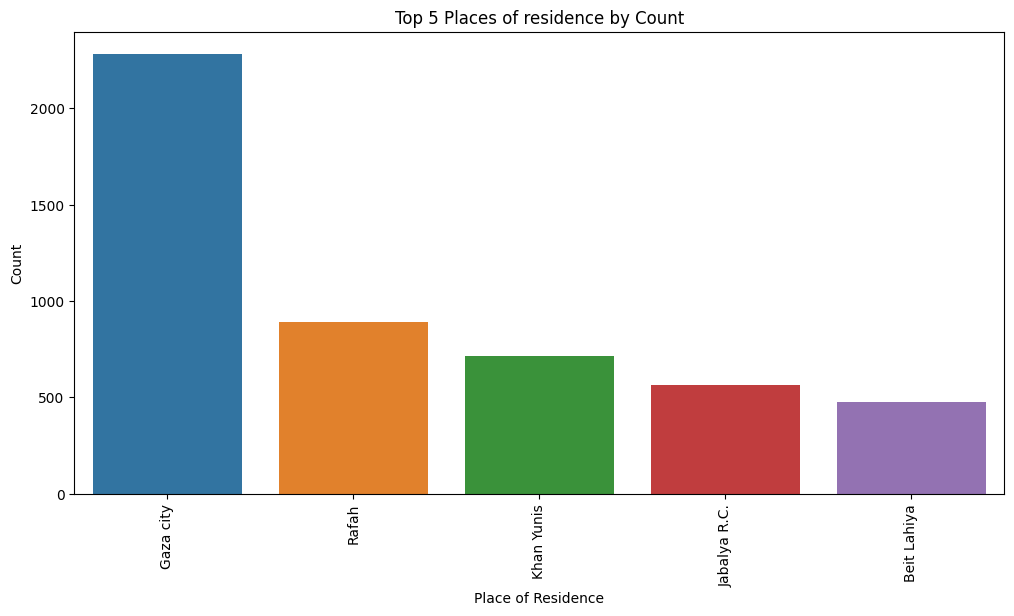

In [17]:
#Top 5 place of residence by count
top5_place_of_residence = df['place_of_residence'].value_counts().head(5)

#Bar plot for the top 5 event locations
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_place_of_residence.index, y=top5_place_of_residence.values)
plt.title('Top 5 Places of residence by Count')
plt.xlabel('Place of Residence')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

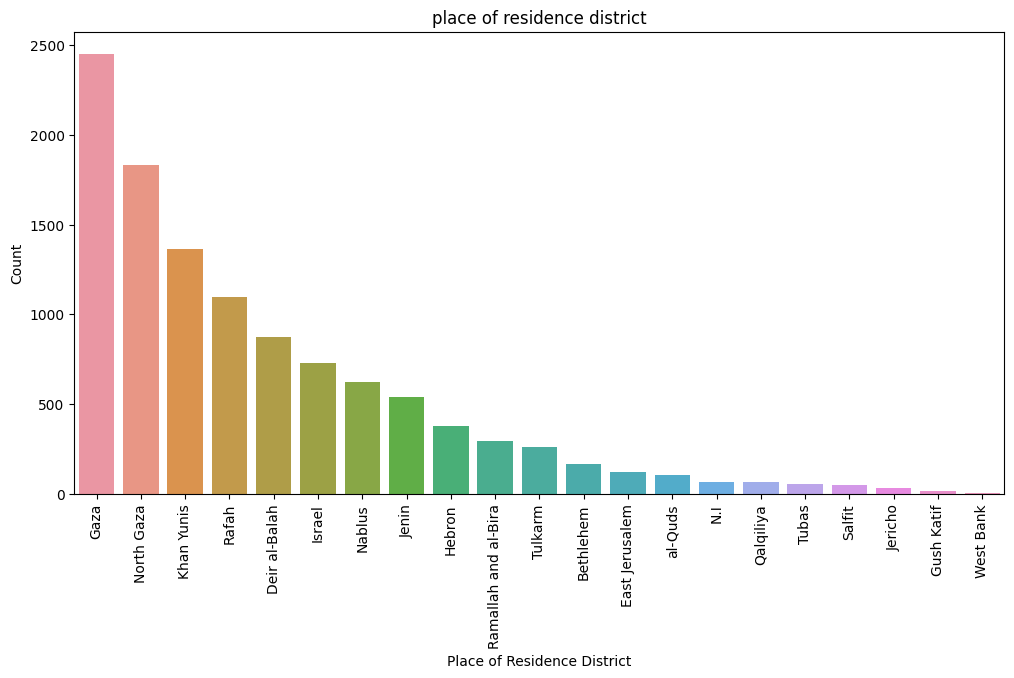

In [18]:
#places of residence by count
place_of_residence_district = df['place_of_residence_district'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=place_of_residence_district.index, y=place_of_residence_district.values)
plt.title('place of residence district')
plt.xlabel('Place of Residence District')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

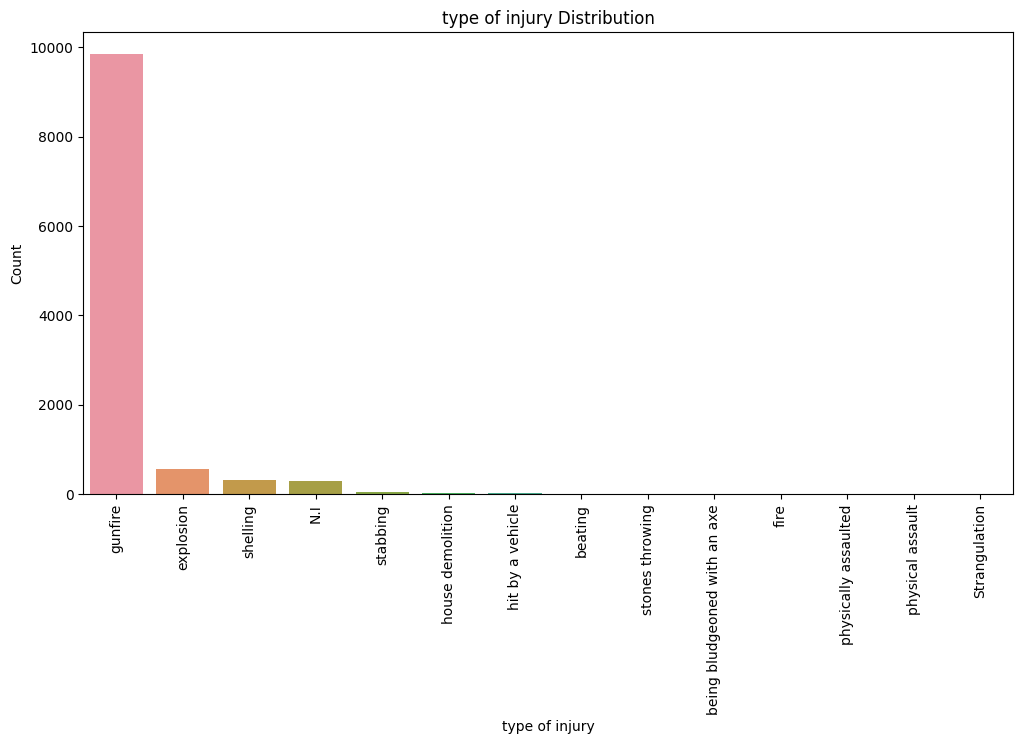

In [19]:
#Bar plot for 'type_of_injury'
type_of_injury_counts = df['type_of_injury'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_of_injury_counts.index, y=type_of_injury_counts.values)
plt.title('type of injury Distribution')
plt.xlabel('type of injury')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Injuries and Ammunation

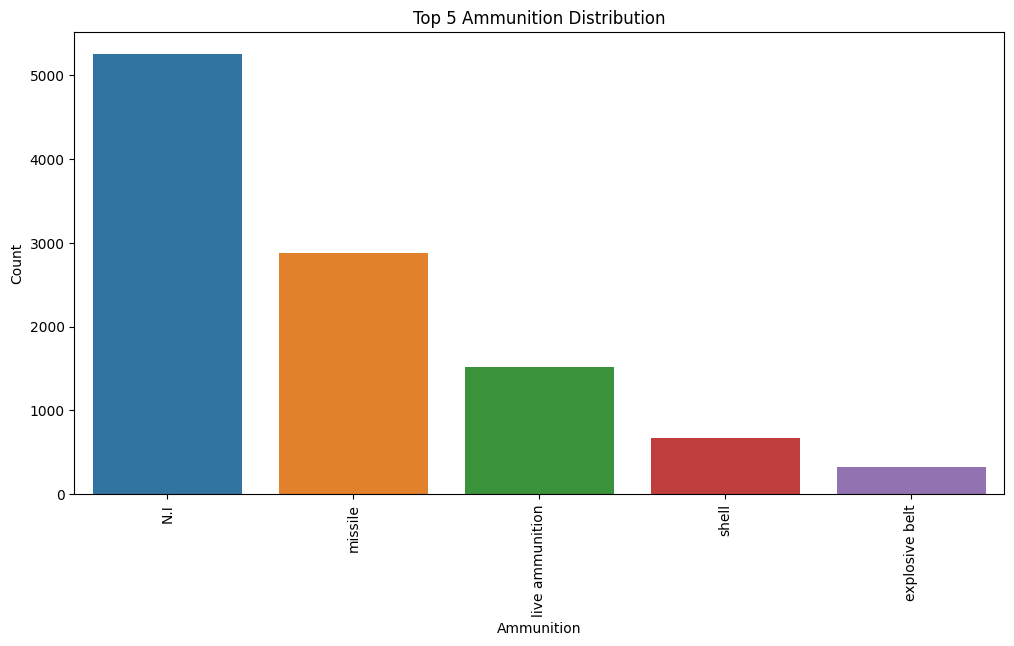

In [20]:
top5_ammunition_counts = df['ammunition'].value_counts().head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top5_ammunition_counts.index, y=top5_ammunition_counts.values)
plt.title('Top 5 Ammunition Distribution')
plt.xlabel('Ammunition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

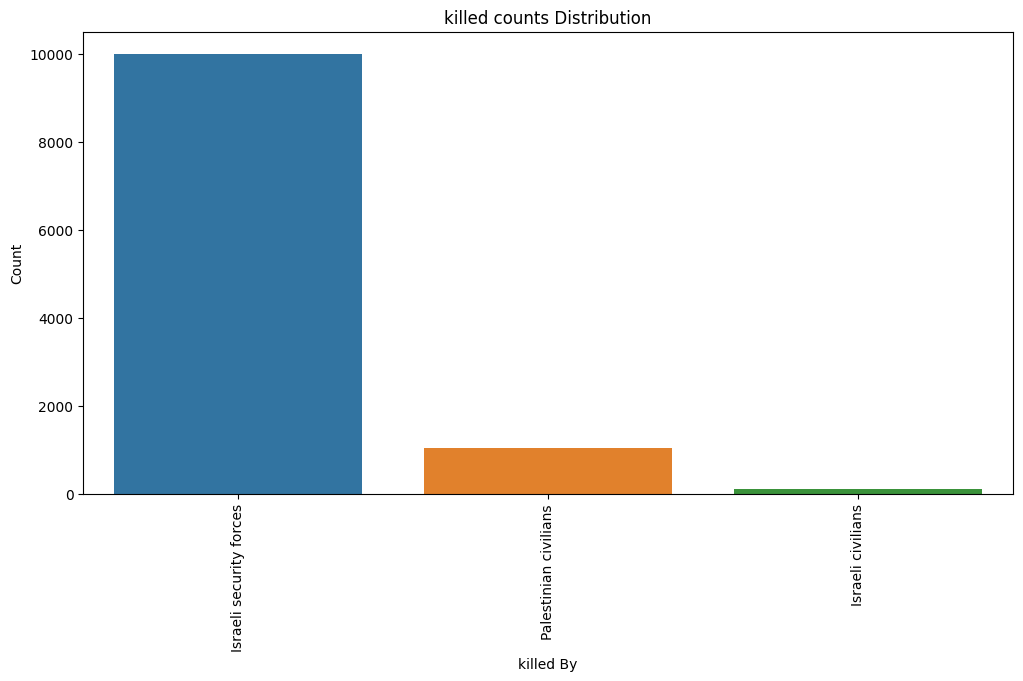

In [21]:
killed_by_counts = df['killed_by'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=killed_by_counts.index, y=killed_by_counts.values)
plt.title('killed counts Distribution')
plt.xlabel('killed By')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# SUMMARY OF EDA

**1.Age Distribution:** The age of individuals in the dataset varies widely, with a mean age of approximately 26.44 years. The majority of individuals fall in the 19-31 age range.

**2.Gender Distribution:** The dataset is skewed toward males, with a higher number of male casualties compared to females. What factors might contribute to this gender disparity?

**3.Citizenship Distribution:** Palestinian citizens outnumber Israeli citizens in the dataset, indicating a higher number of Palestinian casualties. What geopolitical factors might explain this disparity?

**4.Hostilities Involvement:** Over 4000 individuals were not involved in hostilities, while more than 3000 but less than 4000 were involved. Approximately 1000 casualties were Israeli, and nearly 200 were targeted killings. Another 2000 are unidentified. What implications does this distribution have for understanding the conflict?

**5.Time Series Analysis:** Event counts were notably high in 2008-2009 and again in 2015-2016. What historical events or conflicts might have contributed to these spikes?

**6.Events by Israeli Security Forces:** The number of events involving Israeli security forces appears to increase in 2008-2009 and again in 2015. What actions or operations might explain these patterns?

**7.Ammunition Distribution:** The majority of events involve unidentified weapons, followed by Qassam rockets and bombs. In 2015, Grad rockets and missiles were also used. What impact do changes in weaponry have on the conflict?

**8.Geopolitical Analysis:** The top 5 event locations are Gaza City, Rafah, Khan Yunis, Jabalya RC, and Beit Lahiya, with Gaza City having the highest count. What significance do these locations have in the context of the Israeli-Palestinian conflict?

**9.Residence Analysis:** The distribution of place of residence mirrors the event locations, with Gaza City being prominent. What role might these residential areas play in the conflict?

**10.Killed By Counts:** Israeli security forces are responsible for a significant number of casualties, while Palestinian civilians are responsible for fewer casualties. What does this distribution reveal about the conflict dynamics?